# Language-Detection model using MultinomialNB

In [ ]:
#importing necessary libraries

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#loading dataset

df = pd.read_csv("Language Detection.csv")
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [4]:
df["Language"].value_counts()           #value count for each language

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [5]:
#separating independent and dependant features

X = df["Text"]
Y = df["Language"]

In [6]:
le = LabelEncoder()
y = le.fit_transform(Y)

In [22]:
#preprocessed list of data

data_list = []
for text in X:
    text = re.sub('[^\w\s]',' ', text)
    text = re.sub('[0-9]', '', text)
    text = text.lower()
    data_list.append(text)

In [23]:
data_list

[' nature  in the broadest sense  is the natural  physical  material world or universe ',
 ' nature  can refer to the phenomena of the physical world  and also to life in general ',
 'the study of nature is a large  if not the only  part of science ',
 'although humans are part of nature  human activity is often understood as a separate category from other natural phenomena ',
 '   the word nature is borrowed from the old french nature and is derived from the latin word natura  or  essential qualities  innate disposition   and in ancient times  literally meant  birth  ',
 '   in ancient philosophy  natura is mostly used as the latin translation of the greek word physis  φύσις   which originally related to the intrinsic characteristics that plants  animals  and other features of the world develop of their own accord ',
 '     \nthe concept of nature as a whole  the physical universe  is one of several expansions of the original notion    it began with certain core applications of the wo

In [24]:
#bag-of-words

cv = CountVectorizer()
x = cv.fit_transform(data_list).toarray()
x.shape

(10337, 39404)

In [25]:
#train-test-splitting

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [26]:
#model training

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [27]:
#prediction

y_prediction = model.predict(x_test) 

In [28]:
#evaluating model

ac = accuracy_score(y_test, y_prediction)
cm = confusion_matrix(y_test, y_prediction)

In [29]:
ac

0.980174081237911

Hence, the accuracy is 0.98

<AxesSubplot:>

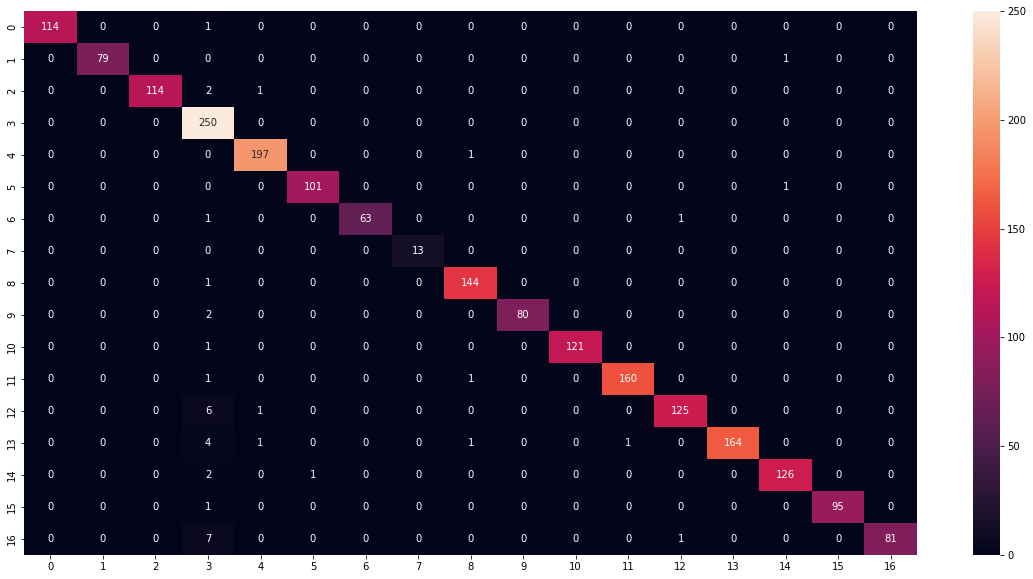

In [30]:
#plotting confusion-matrix

plt.figure(figsize = (20,10))
sns.heatmap(cm, annot = True, fmt = "d")

In [31]:
#function for language prediction

def predict_language(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print(lang)

In [32]:
#result

predict_language("This is my first NLP project.")         #English

['English']


In [33]:
predict_language("Este é meu primeiro projeto de PNL.")    #Portuguese

['Portugeese']


In [34]:
predict_language("Это мой первый проект НЛП.")        #Russian

['Russian']


In [35]:
predict_language("C'est mon premier projet PNL.")      #French

['French']


In [36]:
predict_language("ഇത് എന്റെ ആദ്യത്തെ NLP പ്രോജക്ടാണ്.")    #Malayalam

['Malayalam']
